In [ ]:
import matplotlib.pyplot as plt
from Loop import Train_model
from Model import Unet
from Dataset import Boot_Segmentation_Dataset
import yaml
from torch.optim import AdamW
from torch.nn import BCELoss
import torch
from Batching import img2batch,batch2img,img4batch,batch4img
from Evaluation import Evaluate
import segmentation_models_pytorch as smp
from torch.utils.data import DataLoader
option_path=fr'C:\Code\KD_PRACT\KD_Summer_Work\config.yml'
with open(option_path,'r') as file_option:
    option=yaml.safe_load(file_option)

dataset=Boot_Segmentation_Dataset(option['Segmentation']['img_path'],option['Segmentation']['label_path'])

dataloader=DataLoader(dataset=dataset,batch_size=16,drop_last=False,shuffle=True)

#model=Unet(3,32)
model=smp.Unet('mobilenet_v2', encoder_weights='imagenet', classes=1, activation=None, encoder_depth=5, decoder_channels=[256, 128, 64, 16, 4]).cuda()
loss_fn=BCELoss()
optimizer=AdamW(model.parameters(),lr=0.001)

try:
    weights_dict=torch.load(option['Segmentation']['weights_path'],weights_only=True)
    model.load_state_dict(weights_dict)
except:
    print('Весов нет, инициализируем новые')

Весов нет, инициализируем новые


1
1
1
1
1


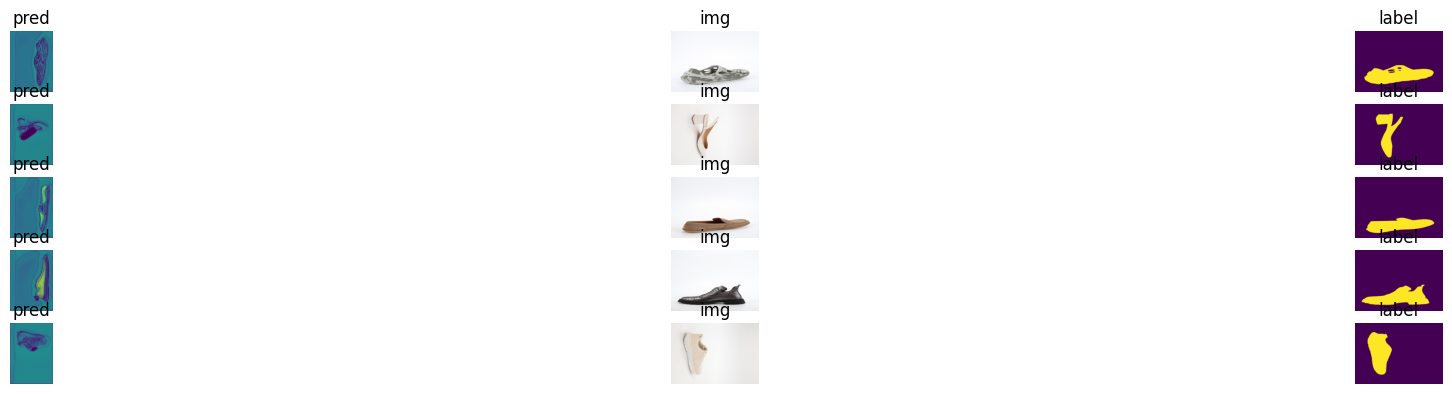

In [2]:
Evaluate(model=model,dataloader=dataloader)